In [1]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00


In [2]:
!pip install gradio --quiet


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import nltk

# Download the required NLTK data
nltk.download('punkt_tab')

# Load the Dataset
import pandas as pd

# Read the dataset
df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Tweet'])

# ... (Rest of your code) ...

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Shape: (74682, 4)
Columns: ['ID', 'Game', 'Sentiment', 'Tweet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Game       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
Miss

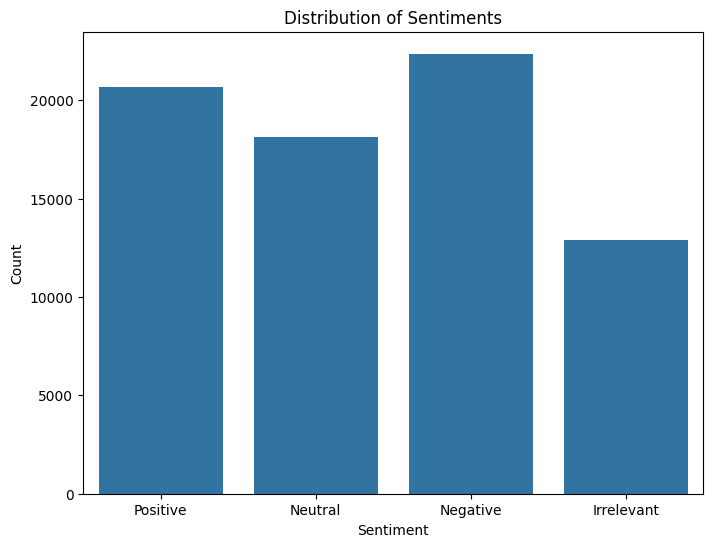

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.6747297297297298

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.69      0.48      0.57      2696
    Negative       0.67      0.80      0.73      4380
     Neutral       0.67      0.61      0.64      3605
    Positive       0.68      0.73      0.70      4119

    accuracy                           0.67     14800
   macro avg       0.68      0.65      0.66     14800
weighted avg       0.68      0.67      0.67     14800



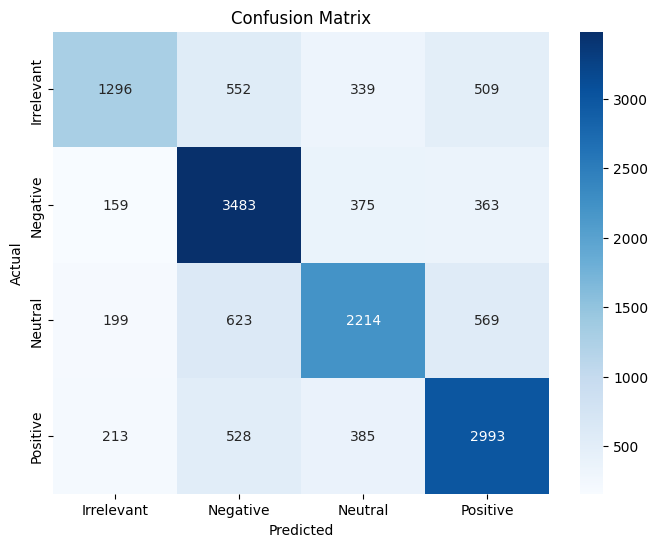

Predicted Sentiment: Positive
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0018766da36735d071.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
# Load the Dataset
import pandas as pd

# Read the dataset
df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Tweet'])

# Data Exploration
# Display first few rows
print(df.head())

# Shape of the dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and non-null values
print(df.info())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop rows with missing values if necessary
df = df.dropna()

# Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Preprocessing Text Data
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Tweet'])
y = df['Sentiment']

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict Sentiment for New Tweets
def predict_sentiment(tweet):
    cleaned_tweet = preprocess_text(tweet)
    tweet_vector = tfidf.transform([cleaned_tweet])
    prediction = model.predict(tweet_vector)
    return prediction[0]

# Example
new_tweet = "I love Borderlands! The gameplay is amazing."
print("Predicted Sentiment:", predict_sentiment(new_tweet))

# Interactive App (Optional)
import gradio as gr

def sentiment_analysis(tweet):
    prediction = predict_sentiment(tweet)
    return f"Predicted Sentiment: {prediction}"

iface = gr.Interface(
    fn=sentiment_analysis,
    inputs=gr.Textbox(lines=2, placeholder="Enter a tweet about Borderlands..."),
    outputs="text",
    title="Borderlands Tweet Sentiment Analysis",
    description="Enter a tweet to predict its sentiment (Positive, Negative, Neutral, Irrelevant)."
)

iface.launch()